# **BASICS OF CONVOLUTION**
## By: Ayush Adarsh
### Notebook no. : 1


## Link to Hand-written Notes: [1-Convolution Basics](https://drive.google.com/file/d/1xi-K28EQrI8w3ooZj0RXjazjzRPlSdxp/view?usp=sharing)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as img
import math

## Creating the Image

### Creating a 8x8 matrix as an image

In [17]:
image = [[100, 111, 122, 102,  58,  24,  15,  16],
 [148, 133,  97,  59,  32,  31,  53,  67],
 [210, 153,  49,   0,   1,  58, 128, 163],
 [173, 115,  15,   0,  24, 107, 187, 223],
 [ 63,  40,  10,  21,  78, 150, 209, 234],
 [  0,   3,  33,  60,  89, 136, 197, 228],
 [  0,  25,  71,  67,  39,  69, 166, 223],
 [ 12,  47,  91,  64,   4,  27, 147, 222]]


In [18]:
im = Image.fromarray(np.array(image,dtype=np.uint8))
im.save('result.png')

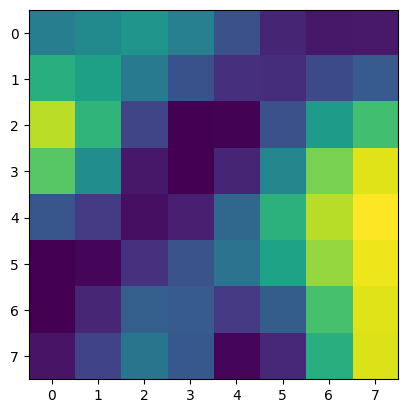

In [19]:
testImage = img.imread('result.png')
plt.imshow(testImage)

## Creating various kernels

### Blurring Kernel

In [20]:
# Kernel for box blur filter
box_blur_kernel = np.array([[0.1111111, 0.1111111, 0.1111111],
 [0.1111111, 0.1111111, 0.1111111],
 [0.1111111, 0.1111111, 0.1111111]])

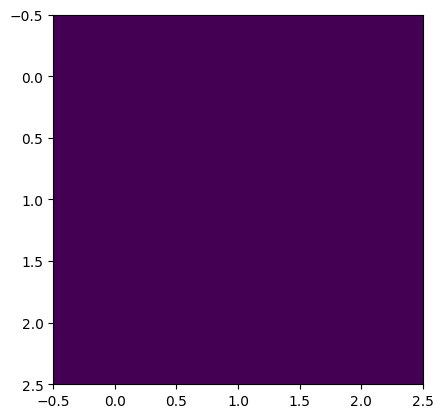

In [22]:
im = Image.fromarray(np.array(box_blur_kernel,dtype=np.uint8))
im.save('box_blur_kernel.png')
testImage = img.imread('box_blur_kernel.png')
plt.imshow(testImage)

### Sharpening Kernel

In [24]:
#kernel for sharpening
sharp_kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])


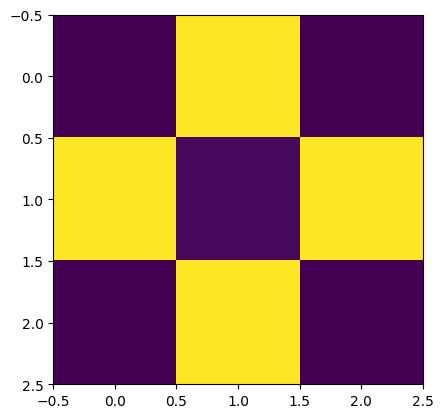

In [25]:
im = Image.fromarray(np.array(sharp_kernel,dtype=np.uint8))
im.save('sharp_kernel.png')
testImage = img.imread('sharp_kernel.png')
plt.imshow(testImage)

### Prewitt operator Kernel (edge detection)




*   Iy kernel detects edges in the horizontal direction
*   Ix kernel detects edges in the vertical direction



In [33]:
Ix= np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]])


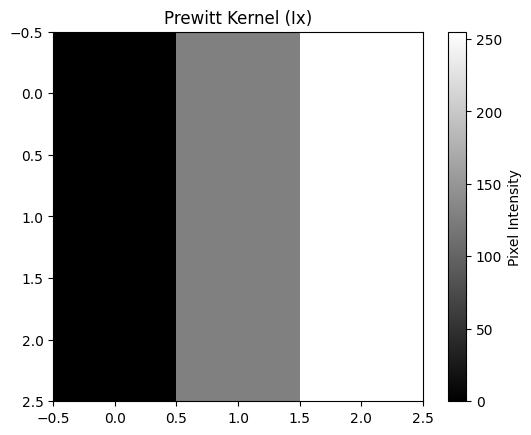

In [34]:
# Normalize to 0-255 for visualization
Ix_normalized = (Ix - Ix.min()) / (Ix.max() - Ix.min()) * 255

plt.imshow(Ix_normalized, cmap='gray', interpolation='nearest')
plt.colorbar(label="Pixel Intensity")
plt.title("Prewitt Kernel (Ix)")
plt.show()

In [36]:
im = Image.fromarray(np.array(Ix_normalized,dtype=np.uint8))
im.save('prewitt_x_grad.png')

In [42]:
Iy =np.array( [
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

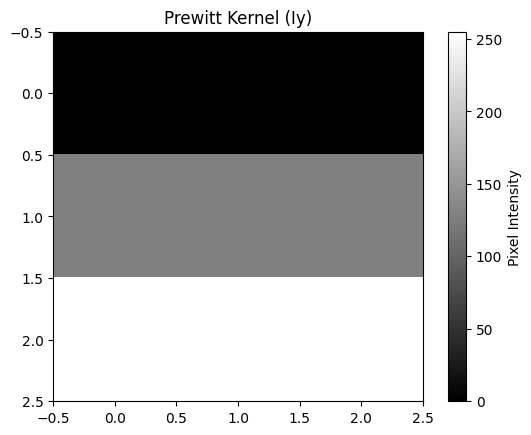

In [43]:
# Normalize to 0-255 for visualization
Iy_normalized = (Iy - Iy.min()) / (Iy.max() - Iy.min()) * 255

plt.imshow(Iy_normalized, cmap='gray', interpolation='nearest')
plt.colorbar(label="Pixel Intensity")
plt.title("Prewitt Kernel (Iy)")
plt.show()

In [44]:
im = Image.fromarray(np.array(Iy_normalized,dtype=np.uint8))
im.save('prewitt_y_grad.png')

## Creating a simple convolution operation

In [94]:
matrix1 = np.array([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11],
    [12, 13, 14, 15]
])


### taking  sub-matrices using for loop




In [95]:
print(matrix1[0:2,1:3])

[[1 2]
 [5 6]]


In [100]:
for i in range(3): # i= row-number
  for j in range(3):  #j = column-number
    sub_matrix = matrix1[i:i+2,j:j+2]
    print(sub_matrix)
    print("-------------------------------")



[[0 1]
 [4 5]]
-------------------------------
[[1 2]
 [5 6]]
-------------------------------
[[2 3]
 [6 7]]
-------------------------------
[[4 5]
 [8 9]]
-------------------------------
[[ 5  6]
 [ 9 10]]
-------------------------------
[[ 6  7]
 [10 11]]
-------------------------------
[[ 8  9]
 [12 13]]
-------------------------------
[[ 9 10]
 [13 14]]
-------------------------------
[[10 11]
 [14 15]]
-------------------------------


### Understanding Dimensions of input,kernel and output

In [75]:
print(len(matrix1))
print(len(matrix1[0]))

4
4


In [76]:
print(f"size of matrix is: {len(matrix1)}x{len(matrix1[0])}")

size of matrix is: 4x4


In [79]:
kernel1 = [[.5, 0],
          [.1, 8]]

In [80]:
print(f"size of kernel is: {len(kernel1)}x{len(kernel1[0])}")

size of kernel is: 2x2


### Formula to Find Output Size
The size of the output matrix when applying a kernel (filter) to an input matrix with a given stride and no padding is:

$$
\text{Output Size (Height or Width)} = \left\lfloor \frac{\text{Input Size} - \text{Kernel Size}}{\text{Stride}} \right\rfloor + 1
$$

#### Where:
- **Input Size**: The height or width of the input matrix.
- **Kernel Size**: The height or width of the kernel (assumed square for simplicity).
- **Stride**: The step size by which the kernel moves across the matrix.
- **Output Size**: The height or width of the resulting output matrix.


Taking GIF (greatest integer function) of a number.
GIF is the floor of the number

In [113]:
print(f"GIF of number 6.8 is:  {int(math.floor(6.8))}")
print(f"GIF of number 6 is:  {int(math.floor(6))}")
print(f"GIF of number 6.1 is:  {int(math.floor(6.1))}")
print(f"GIF of number 7.1 is:  {int(math.floor(7.1))}")

GIF of number 6.8 is:  6
GIF of number 6 is:  6
GIF of number 6.1 is:  6
GIF of number 7.1 is:  7


In [69]:
def output_size(input_dim,kernel_dim,stride):
  return (int(math.floor((input_dim-kernel_dim)/stride)))+1

## The Convolution Function

In [88]:
def convolution(matrix, kernel):
    matrix = np.array(matrix)
    kernel = np.array(kernel)

    kernel_length = len(kernel[0])
    kernel_breadth = len(kernel)
    matrix_length = len(matrix[0])
    matrix_breadth = len(matrix)

    output_rows = output_size(matrix_breadth, kernel_breadth,1)
    output_cols = output_size(matrix_length, kernel_length,1)
    output = np.empty([output_rows, output_cols])

    for i in range(output_rows):
        for j in range(output_cols):
            sub_matrix = matrix[i:i+kernel_breadth, j:j+kernel_length]
            output[i, j] = np.sum(sub_matrix * kernel) #simple convolution: takes dot-product b/w sub-matrix and kernel

    return output


In [89]:
print(convolution(matrix1,kernel1))

[[ 40.4  49.   57.6]
 [ 74.8  83.4  92. ]
 [109.2 117.8 126.4]]


### Max-pooling operation

In [103]:
def max_pooling(matrix, kernel):
    matrix = np.array(matrix)
    kernel = np.array(kernel)

    kernel_length = len(kernel[0])
    kernel_breadth = len(kernel)
    matrix_length = len(matrix[0])
    matrix_breadth = len(matrix)

    output_rows = output_size(matrix_breadth, kernel_breadth,1)
    output_cols = output_size(matrix_length, kernel_length,1)
    output = np.empty([output_rows, output_cols])

    for i in range(output_rows):
        for j in range(output_cols):
            sub_matrix = matrix[i:i+kernel_breadth, j:j+kernel_length]
            output[i, j] = np.max(sub_matrix)    #taking maximum of the sub-matrix

    return output


In [109]:
print("matrix1: ")
print(matrix1)

matrix1: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [110]:
print("max_pooling operation: ")
print(max_pooling(matrix1,kernel1))

max_pooling operation: 
[[ 5.  6.  7.]
 [ 9. 10. 11.]
 [13. 14. 15.]]


### Average-pooling takes the average of the sub-matrix